# Content

<ul>
    <li> Dataframes </li>
    <li> Visual </li>
</ul>

## Indroduction

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint
import sys
sys.path.insert(1, '../../')
import prototype_nn as NN

This is used to check wether the neural network is producing the correct for our test data

## Dataframes

This is following is used to build the test dataframes

In [2]:
SIGMA = 10
BETA = 8/3
RHO = 28

def lorenz(state, t):
    x, y, z = state
    dxdt = SIGMA * (y - x)
    dydt = x * (RHO - z) - y
    dzdt = x * y - BETA * z
    return dxdt, dydt, dzdt

def states(x, y, z, t):
    """
        states:
            This will be used to implement the model -lorenz model using the odeint
            method. It then returns the states belonging to the system
        Args:
            x (int): This is the x value
            y (int): This is the y value
            z (int): This is the z value
        Returns
            (<class 'numpy.ndarray'>) : This is the data of the model.
    """
    state_0 = [x, y, z]
    states = odeint(lorenz, state_0, t)
    return states
    
def dataframe(x, y, z, t, init_x, init_y, init_z):
    """
        dataframe:
            This will produce the dataframe of the van der pol model
            showing the x, y state values including the time variable,
            initial x and y state values
        Args:
            x (int):
                The x value state to start from
            y (int): 
                The y value state to start from
            z (int): 
                The z value state to start from
            t (int): 
                The time series
            init_x (int) :
                The initial x state value
            init_y (int):
                The initial y state value
            init_z (int):
                The initial z state value
        Return:
            (<class 'pandas.core.frame.DataFrame'>): The dataframe of the model
    """
    state = states(x, y, z,t)
    data = {'time' : t, 'x' : state[:, 0], 'y' : state[:, 1], 'z' : state[:, 2]}
    df = pd.DataFrame(data=data)
    df['initial_x'] = init_x
    df['initial_y'] = init_y
    df['initial_z'] = init_z
    return df

This is the test data to go through to see if we can make predictions

In [3]:
t = np.arange(0, 50.1, 0.01)
test_df_0 = []
for x in range(5,7):
    for y in range(5,7):
        for z in range(5,7):
            df = dataframe(x,y,z,t,x,y,z) # test for 5, 6
            test_df_0.append(df)

In [4]:
len(test_df_0)

8

In [5]:
test_df_0[0]

,time,x,y,z,initial_x,initial_y,initial_z
0,0.00,5.000000,5.000000,5.000000,5,5,5
1,0.01,5.053028,6.095245,5.143320,5,5,5
2,0.02,5.205275,7.194454,5.344007,5,5,5
3,0.03,5.448557,8.315308,5.610729,5,5,5
4,0.04,5.776993,9.472161,5.955394,5,5,5
...,...,...,...,...,...,...,...
5005,50.05,12.448348,8.943665,35.587767,5,5,5
5006,50.06,12.065189,7.922209,35.671372,5,5,5
5007,50.07,11.623087,6.941660,35.601175,5,5,5
5008,50.08,11.132566,6.022367,35.391768,5,5,5


In [6]:
test_df_0[1]

,time,x,y,z,initial_x,initial_y,initial_z
0,0.00,5.000000,5.000000,6.000000,5,5,6
1,0.01,5.050631,6.045823,6.115725,5,5,6
2,0.02,5.196016,7.095536,6.286706,5,5,6
3,0.03,5.428310,8.165228,6.520982,5,5,6
4,0.04,5.741800,9.267985,6.829517,5,5,6
...,...,...,...,...,...,...,...
5005,50.05,2.762149,4.437797,14.300718,5,5,6
5006,50.06,2.938210,4.785569,14.054069,5,5,6
5007,50.07,3.131997,5.162370,13.833173,5,5,6
5008,50.08,3.344698,5.570504,13.640603,5,5,6


In [7]:
test_df_0[2]

,time,x,y,z,initial_x,initial_y,initial_z
0,0.00,5.000000,6.000000,5.000000,5,6,5
1,0.01,5.148029,7.095010,5.195972,5,6,5
2,0.02,5.387082,8.211446,5.456764,5,6,5
3,0.03,5.711272,9.363959,5.794092,5,6,5
4,0.04,6.116502,10.563809,6.222832,5,6,5
...,...,...,...,...,...,...,...
5005,50.05,-4.636555,-7.974621,13.206847,5,6,5
5006,50.06,-4.984230,-8.602153,13.252702,5,6,5
5007,50.07,-5.360618,-9.272718,13.360097,5,6,5
5008,50.08,-5.767072,-9.985985,13.537193,5,6,5


In [8]:
test_df_0[3]

,time,x,y,z,initial_x,initial_y,initial_z
0,0.00,5.000000,6.000000,6.000000,5,6,6
1,0.01,5.145616,7.045115,6.168345,5,6,6
2,0.02,5.377706,8.110736,6.399211,5,6,6
3,0.03,5.690655,9.210054,6.703505,5,6,6
4,0.04,6.080489,10.353192,7.094964,5,6,6
...,...,...,...,...,...,...,...
5005,50.05,2.736660,1.115121,23.545645,5,6,6
5006,50.06,2.587833,1.229687,22.956805,5,6,6
5007,50.07,2.464417,1.351277,22.384834,5,6,6
5008,50.08,2.364631,1.479289,21.829469,5,6,6


Combine all the data together to get the overall results

In [9]:
test_df_0_combine = pd.concat(test_df_0)
test_df_0_combine

,time,x,y,z,initial_x,initial_y,initial_z
0,0.00,5.000000,5.000000,5.000000,5,5,5
1,0.01,5.053028,6.095245,5.143320,5,5,5
2,0.02,5.205275,7.194454,5.344007,5,5,5
3,0.03,5.448557,8.315308,5.610729,5,5,5
4,0.04,5.776993,9.472161,5.955394,5,5,5
...,...,...,...,...,...,...,...
5005,50.05,12.492087,7.023438,37.305692,6,6,6
5006,50.06,11.913419,5.833996,37.097713,6,6,6
5007,50.07,11.281362,4.745650,36.726249,6,6,6
5008,50.08,10.611440,3.774091,36.219211,6,6,6


In [10]:
test_df_0_combine['initial_x,initial_y,initial_z'] = list(zip(test_df_0_combine.initial_x, test_df_0_combine.initial_y, test_df_0_combine.initial_z))
test_df_0_combine = test_df_0_combine.drop(columns=['initial_x','initial_y','initial_y'])
test_df_0_combine

,time,x,y,z,initial_z,"initial_x,initial_y,initial_z"
0,0.00,5.000000,5.000000,5.000000,5,"(5, 5, 5)"
1,0.01,5.053028,6.095245,5.143320,5,"(5, 5, 5)"
2,0.02,5.205275,7.194454,5.344007,5,"(5, 5, 5)"
3,0.03,5.448557,8.315308,5.610729,5,"(5, 5, 5)"
4,0.04,5.776993,9.472161,5.955394,5,"(5, 5, 5)"
...,...,...,...,...,...,...
5005,50.05,12.492087,7.023438,37.305692,6,"(6, 6, 6)"
5006,50.06,11.913419,5.833996,37.097713,6,"(6, 6, 6)"
5007,50.07,11.281362,4.745650,36.726249,6,"(6, 6, 6)"
5008,50.08,10.611440,3.774091,36.219211,6,"(6, 6, 6)"


We want carry on from t = 199.9 of the van der pol model that is saved in the csv data files. This would be used later to see how accurate the neural network can predict future simulations

In [11]:
t = np.arange(50.09, 60.0, 0.01)
test_df = []
for init_x in range(1,3):
    df = pd.DataFrame(pd.read_csv("../../data/train/lorenz.csv"))
    for init_y in range(1,3):
        for init_z in range(1,3):
            row = df[(df.initial_x == init_x) & (df.initial_y == init_y ) & (df.initial_z == init_z ) & (df.time == 50.09)]
            df_1 = dataframe(row.x.item(), row.y.item(), row.z.item(), t, init_x, init_y, init_z)
            test_df.append(df_1)

This is the length of the test dataframe

In [12]:
len(test_df)

8

The following short data fragements is used to show what is within the data

In [13]:
test_df[0]

,time,x,y,z,initial_x,initial_y,initial_z
0,50.09,4.002857,6.902187,12.830906,1,1,1
1,50.10,4.305477,7.461299,12.787611,1,1,1
2,50.11,4.634574,8.063426,12.793452,1,1,1
3,50.12,4.991789,8.709886,12.855079,1,1,1
4,50.13,5.378702,9.401296,12.980113,1,1,1
...,...,...,...,...,...,...,...
986,59.95,0.468216,0.858656,12.062012,1,1,1
987,59.96,0.508683,0.928316,11.748914,1,1,1
988,59.97,0.552293,1.005639,11.444811,1,1,1
989,59.98,0.599510,1.091315,11.149606,1,1,1


In [14]:
test_df[1]

,time,x,y,z,initial_x,initial_y,initial_z
0,50.09,1.518850,2.125628,15.711834,1,1,2
1,50.10,1.584788,2.297090,15.332235,1,1,2
2,50.11,1.661393,2.481708,14.967031,1,1,2
3,50.12,1.748976,2.681055,14.616601,1,1,2
4,50.13,1.847975,2.896810,14.281452,1,1,2
...,...,...,...,...,...,...,...
986,59.95,-2.394645,-2.028272,20.692798,1,1,2
987,59.96,-2.367393,-2.186986,20.197758,1,1,2
988,59.97,-2.358244,-2.354206,19.719167,1,1,2
989,59.98,-2.366323,-2.530779,19.257165,1,1,2


In [15]:
test_df[2]

,time,x,y,z,initial_x,initial_y,initial_z
0,50.09,-5.161799,-2.133485,27.437191,1,2,1
1,50.10,-4.874465,-2.155639,26.821209,1,2,1
2,50.11,-4.617882,-2.204022,26.217354,1,2,1
3,50.12,-4.391445,-2.275135,25.626865,1,2,1
4,50.13,-4.194304,-2.366081,25.050681,1,2,1
...,...,...,...,...,...,...,...
986,59.95,4.843669,1.291915,27.810911,1,2,1
987,59.96,4.505995,1.303364,27.138786,1,2,1
988,59.97,4.202890,1.341829,26.481340,1,2,1
989,59.98,3.933411,1.402819,25.839472,1,2,1


In [16]:
test_df[3]

,time,x,y,z,initial_x,initial_y,initial_z
0,50.09,-10.909702,-14.341099,25.580013,1,2,2
1,50.10,-11.240588,-14.415529,26.479570,1,2,2
2,50.11,-11.542390,-14.391942,27.403319,1,2,2
3,50.12,-11.808205,-14.263664,28.334443,1,2,2
4,50.13,-12.031291,-14.027026,29.254219,1,2,2
...,...,...,...,...,...,...,...
986,59.95,-13.759721,-5.678309,40.850087,1,2,2
987,59.96,-12.905241,-3.942519,40.406965,1,2,2
988,59.97,-11.976327,-2.406175,39.732062,1,2,2
989,59.98,-11.000059,-1.087437,38.883214,1,2,2


This will combine all the test dataframes together

In [17]:
test_df_combine = pd.concat(test_df)
test_df_combine 

,time,x,y,z,initial_x,initial_y,initial_z
0,50.09,4.002857,6.902187,12.830906,1,1,1
1,50.10,4.305477,7.461299,12.787611,1,1,1
2,50.11,4.634574,8.063426,12.793452,1,1,1
3,50.12,4.991789,8.709886,12.855079,1,1,1
4,50.13,5.378702,9.401296,12.980113,1,1,1
...,...,...,...,...,...,...,...
986,59.95,5.127117,1.463024,28.155866,2,2,2
987,59.96,4.777891,1.457166,27.486137,2,2,2
988,59.97,4.462830,1.481262,26.829687,2,2,2
989,59.98,4.181297,1.530538,26.187771,2,2,2


This will add a new column initial_x, initial_y as a tuple column, and drop the initial_x and initial_y columns. this will be used later for plotting the graphs

In [18]:
test_df_combine['initial_x,initial_y,initial_z'] = list(zip(test_df_combine.initial_x, test_df_combine.initial_y, test_df_combine.initial_z))
test_df_combine = test_df_combine.drop(columns=['initial_x','initial_y','initial_z'])
test_df_combine

,time,x,y,z,"initial_x,initial_y,initial_z"
0,50.09,4.002857,6.902187,12.830906,"(1, 1, 1)"
1,50.10,4.305477,7.461299,12.787611,"(1, 1, 1)"
2,50.11,4.634574,8.063426,12.793452,"(1, 1, 1)"
3,50.12,4.991789,8.709886,12.855079,"(1, 1, 1)"
4,50.13,5.378702,9.401296,12.980113,"(1, 1, 1)"
...,...,...,...,...,...
986,59.95,5.127117,1.463024,28.155866,"(2, 2, 2)"
987,59.96,4.777891,1.457166,27.486137,"(2, 2, 2)"
988,59.97,4.462830,1.481262,26.829687,"(2, 2, 2)"
989,59.98,4.181297,1.530538,26.187771,"(2, 2, 2)"


we want to give this data to the neural network to predict.

In [19]:
def preds(num_inputs, num_classes, learning_rate, inputs):
    model_x = NN.prototype(num_inputs, num_classes, learning_rate)
    model_x.load_state_dict(NN.torch.load("../../data/state/lorenz/lorenz_x.pth"))
    preds_x = model_x(inputs).detach().numpy().flatten()
    
    model_y = NN.prototype(num_inputs, num_classes, learning_rate)
    model_y.load_state_dict(NN.torch.load("../../data/state/lorenz/lorenz_y.pth"))
    preds_y = model_y(inputs).detach().numpy().flatten()
    
    model_z = NN.prototype(num_inputs, num_classes, learning_rate)
    model_z.load_state_dict(NN.torch.load("../../data/state/lorenz/lorenz_z.pth"))
    preds_z = model_y(inputs).detach().numpy().flatten()
    
    return preds_x, preds_y, preds_z

This is following code will produce predictions made by the neural network from preds_test_df

In [20]:
def dataframe_predictions(test_df):
    preds_test_df = []
    for i in range(0, len(test_df)):
        preds_x, preds_y, preds_z = preds(4, 1, 0.01, NN.torch.from_numpy( test_df[i][['time','initial_x','initial_y','initial_z']].to_numpy(dtype='float32') ))
        df = test_df[i]
        df["x_preds"] = preds_x
        df["y_preds"] = preds_y
        df["z_preds"] = preds_z
        preds_test_df.append(df)
    return preds_test_df

The next following code would be looking at the predictions which the neural network made

In [21]:
preds_test_df_0 = dataframe_predictions(test_df_0)

In [22]:
len(preds_test_df_0)

8

In [23]:
preds_test_df_0[0]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,0.00,5.000000,5.000000,5.000000,5,5,5,0.012435,0.151089,0.151089
1,0.01,5.053028,6.095245,5.143320,5,5,5,0.012588,0.151171,0.151171
2,0.02,5.205275,7.194454,5.344007,5,5,5,0.012741,0.151253,0.151253
3,0.03,5.448557,8.315308,5.610729,5,5,5,0.012894,0.151335,0.151335
4,0.04,5.776993,9.472161,5.955394,5,5,5,0.013049,0.151417,0.151417
...,...,...,...,...,...,...,...,...,...,...
5005,50.05,12.448348,8.943665,35.587767,5,5,5,0.620701,0.333533,0.333533
5006,50.06,12.065189,7.922209,35.671372,5,5,5,0.620797,0.333575,0.333575
5007,50.07,11.623087,6.941660,35.601175,5,5,5,0.620892,0.333616,0.333616
5008,50.08,11.132566,6.022367,35.391768,5,5,5,0.620988,0.333658,0.333658


In [24]:
preds_test_df_0[1]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,0.00,5.000000,5.000000,6.000000,5,5,6,0.010758,0.171553,0.171553
1,0.01,5.050631,6.045823,6.115725,5,5,6,0.010856,0.171669,0.171669
2,0.02,5.196016,7.095536,6.286706,5,5,6,0.010955,0.171787,0.171787
3,0.03,5.428310,8.165228,6.520982,5,5,6,0.011051,0.171908,0.171908
4,0.04,5.741800,9.267985,6.829517,5,5,6,0.011146,0.172029,0.172029
...,...,...,...,...,...,...,...,...,...,...
5005,50.05,2.762149,4.437797,14.300718,5,5,6,0.629694,0.345510,0.345510
5006,50.06,2.938210,4.785569,14.054069,5,5,6,0.629789,0.345551,0.345551
5007,50.07,3.131997,5.162370,13.833173,5,5,6,0.629884,0.345591,0.345591
5008,50.08,3.344698,5.570504,13.640603,5,5,6,0.629979,0.345632,0.345632


In [25]:
preds_test_df_0[2]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,0.00,5.000000,6.000000,5.000000,5,6,5,0.012568,0.154654,0.154654
1,0.01,5.148029,7.095010,5.195972,5,6,5,0.012689,0.154781,0.154781
2,0.02,5.387082,8.211446,5.456764,5,6,5,0.012810,0.154910,0.154910
3,0.03,5.711272,9.363959,5.794092,5,6,5,0.012931,0.155041,0.155041
4,0.04,6.116502,10.563809,6.222832,5,6,5,0.013052,0.155172,0.155172
...,...,...,...,...,...,...,...,...,...,...
5005,50.05,-4.636555,-7.974621,13.206847,5,6,5,0.622050,0.332699,0.332699
5006,50.06,-4.984230,-8.602153,13.252702,5,6,5,0.622148,0.332738,0.332738
5007,50.07,-5.360618,-9.272718,13.360097,5,6,5,0.622245,0.332778,0.332778
5008,50.08,-5.767072,-9.985985,13.537193,5,6,5,0.622343,0.332818,0.332818


In [26]:
preds_test_df_0[3]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,0.00,5.000000,6.000000,6.000000,5,6,6,0.009860,0.175865,0.175865
1,0.01,5.145616,7.045115,6.168345,5,6,6,0.009950,0.175942,0.175942
2,0.02,5.377706,8.110736,6.399211,5,6,6,0.010040,0.176021,0.176021
3,0.03,5.690655,9.210054,6.703505,5,6,6,0.010131,0.176100,0.176100
4,0.04,6.080489,10.353192,7.094964,5,6,6,0.010221,0.176179,0.176179
...,...,...,...,...,...,...,...,...,...,...
5005,50.05,2.736660,1.115121,23.545645,5,6,6,0.631654,0.345451,0.345451
5006,50.06,2.587833,1.229687,22.956805,5,6,6,0.631748,0.345495,0.345495
5007,50.07,2.464417,1.351277,22.384834,5,6,6,0.631841,0.345539,0.345539
5008,50.08,2.364631,1.479289,21.829469,5,6,6,0.631935,0.345582,0.345582


In [27]:
preds_test_df_0_combine = pd.concat(preds_test_df_0)
preds_test_df_0_combine

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,0.00,5.000000,5.000000,5.000000,5,5,5,0.012435,0.151089,0.151089
1,0.01,5.053028,6.095245,5.143320,5,5,5,0.012588,0.151171,0.151171
2,0.02,5.205275,7.194454,5.344007,5,5,5,0.012741,0.151253,0.151253
3,0.03,5.448557,8.315308,5.610729,5,5,5,0.012894,0.151335,0.151335
4,0.04,5.776993,9.472161,5.955394,5,5,5,0.013049,0.151417,0.151417
...,...,...,...,...,...,...,...,...,...,...
5005,50.05,12.492087,7.023438,37.305692,6,6,6,0.644509,0.346329,0.346329
5006,50.06,11.913419,5.833996,37.097713,6,6,6,0.644611,0.346372,0.346372
5007,50.07,11.281362,4.745650,36.726249,6,6,6,0.644713,0.346414,0.346414
5008,50.08,10.611440,3.774091,36.219211,6,6,6,0.644816,0.346457,0.346457


In [28]:
preds_test_df_0_combine['initial_x,initial_y,initial_z'] = list(zip(preds_test_df_0_combine.initial_x, preds_test_df_0_combine.initial_y, preds_test_df_0_combine.initial_z))
preds_test_df_0_combine = preds_test_df_0_combine.drop(columns=['initial_x','initial_y','initial_z'])
preds_test_df_0_combine

,time,x,y,z,x_preds,y_preds,z_preds,"initial_x,initial_y,initial_z"
0,0.00,5.000000,5.000000,5.000000,0.012435,0.151089,0.151089,"(5, 5, 5)"
1,0.01,5.053028,6.095245,5.143320,0.012588,0.151171,0.151171,"(5, 5, 5)"
2,0.02,5.205275,7.194454,5.344007,0.012741,0.151253,0.151253,"(5, 5, 5)"
3,0.03,5.448557,8.315308,5.610729,0.012894,0.151335,0.151335,"(5, 5, 5)"
4,0.04,5.776993,9.472161,5.955394,0.013049,0.151417,0.151417,"(5, 5, 5)"
...,...,...,...,...,...,...,...,...
5005,50.05,12.492087,7.023438,37.305692,0.644509,0.346329,0.346329,"(6, 6, 6)"
5006,50.06,11.913419,5.833996,37.097713,0.644611,0.346372,0.346372,"(6, 6, 6)"
5007,50.07,11.281362,4.745650,36.726249,0.644713,0.346414,0.346414,"(6, 6, 6)"
5008,50.08,10.611440,3.774091,36.219211,0.644816,0.346457,0.346457,"(6, 6, 6)"


In [29]:
preds_test_df = dataframe_predictions(test_df)

In [30]:
len(preds_test_df)

8

In [31]:
preds_test_df[0]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,50.09,4.002857,6.902187,12.830906,1,1,1,0.531233,0.258912,0.258912
1,50.10,4.305477,7.461299,12.787611,1,1,1,0.531339,0.258949,0.258949
2,50.11,4.634574,8.063426,12.793452,1,1,1,0.531444,0.258986,0.258986
3,50.12,4.991789,8.709886,12.855079,1,1,1,0.531550,0.259023,0.259023
4,50.13,5.378702,9.401296,12.980113,1,1,1,0.531656,0.259060,0.259060
...,...,...,...,...,...,...,...,...,...,...
986,59.95,0.468216,0.858656,12.062012,1,1,1,0.635008,0.294782,0.294782
987,59.96,0.508683,0.928316,11.748914,1,1,1,0.635113,0.294818,0.294818
988,59.97,0.552293,1.005639,11.444811,1,1,1,0.635218,0.294854,0.294854
989,59.98,0.599510,1.091315,11.149606,1,1,1,0.635323,0.294891,0.294891


In [32]:
preds_test_df[1]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,50.09,1.518850,2.125628,15.711834,1,1,2,0.536036,0.275051,0.275051
1,50.10,1.584788,2.297090,15.332235,1,1,2,0.536142,0.275087,0.275087
2,50.11,1.661393,2.481708,14.967031,1,1,2,0.536247,0.275123,0.275123
3,50.12,1.748976,2.681055,14.616601,1,1,2,0.536352,0.275158,0.275158
4,50.13,1.847975,2.896810,14.281452,1,1,2,0.536457,0.275194,0.275194
...,...,...,...,...,...,...,...,...,...,...
986,59.95,-2.394645,-2.028272,20.692798,1,1,2,0.639817,0.310301,0.310301
987,59.96,-2.367393,-2.186986,20.197758,1,1,2,0.639923,0.310337,0.310337
988,59.97,-2.358244,-2.354206,19.719167,1,1,2,0.640029,0.310372,0.310372
989,59.98,-2.366323,-2.530779,19.257165,1,1,2,0.640135,0.310408,0.310408


In [33]:
preds_test_df[2]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,50.09,-5.161799,-2.133485,27.437191,1,2,1,0.536337,0.262603,0.262603
1,50.10,-4.874465,-2.155639,26.821209,1,2,1,0.536441,0.262639,0.262639
2,50.11,-4.617882,-2.204022,26.217354,1,2,1,0.536546,0.262675,0.262675
3,50.12,-4.391445,-2.275135,25.626865,1,2,1,0.536651,0.262711,0.262711
4,50.13,-4.194304,-2.366081,25.050681,1,2,1,0.536756,0.262747,0.262747
...,...,...,...,...,...,...,...,...,...,...
986,59.95,4.843669,1.291915,27.810911,1,2,1,0.639752,0.298418,0.298418
987,59.96,4.505995,1.303364,27.138786,1,2,1,0.639857,0.298455,0.298455
988,59.97,4.202890,1.341829,26.481340,1,2,1,0.639962,0.298491,0.298491
989,59.98,3.933411,1.402819,25.839472,1,2,1,0.640067,0.298528,0.298528


In [34]:
preds_test_df[3]

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,50.09,-10.909702,-14.341099,25.580013,1,2,2,0.540283,0.280080,0.280080
1,50.10,-11.240588,-14.415529,26.479570,1,2,2,0.540388,0.280115,0.280115
2,50.11,-11.542390,-14.391942,27.403319,1,2,2,0.540493,0.280151,0.280151
3,50.12,-11.808205,-14.263664,28.334443,1,2,2,0.540597,0.280186,0.280186
4,50.13,-12.031291,-14.027026,29.254219,1,2,2,0.540702,0.280221,0.280221
...,...,...,...,...,...,...,...,...,...,...
986,59.95,-13.759721,-5.678309,40.850087,1,2,2,0.643778,0.315008,0.315008
987,59.96,-12.905241,-3.942519,40.406965,1,2,2,0.643883,0.315044,0.315044
988,59.97,-11.976327,-2.406175,39.732062,1,2,2,0.643987,0.315080,0.315080
989,59.98,-11.000059,-1.087437,38.883214,1,2,2,0.644092,0.315115,0.315115


We want to combine the cells together to make one cell.

In [35]:
preds_test_df_combine = pd.concat(preds_test_df)
preds_test_df_combine

,time,x,y,z,initial_x,initial_y,initial_z,x_preds,y_preds,z_preds
0,50.09,4.002857,6.902187,12.830906,1,1,1,0.531233,0.258912,0.258912
1,50.10,4.305477,7.461299,12.787611,1,1,1,0.531339,0.258949,0.258949
2,50.11,4.634574,8.063426,12.793452,1,1,1,0.531444,0.258986,0.258986
3,50.12,4.991789,8.709886,12.855079,1,1,1,0.531550,0.259023,0.259023
4,50.13,5.378702,9.401296,12.980113,1,1,1,0.531656,0.259060,0.259060
...,...,...,...,...,...,...,...,...,...,...
986,59.95,5.127117,1.463024,28.155866,2,2,2,0.654247,0.314579,0.314579
987,59.96,4.777891,1.457166,27.486137,2,2,2,0.654351,0.314615,0.314615
988,59.97,4.462830,1.481262,26.829687,2,2,2,0.654454,0.314650,0.314650
989,59.98,4.181297,1.530538,26.187771,2,2,2,0.654558,0.314686,0.314686


In [36]:
preds_test_df_combine['initial_x,initial_y,initial_z'] = list(zip(preds_test_df_combine.initial_x, preds_test_df_combine.initial_y, preds_test_df_combine.initial_z))
preds_test_df_combine = preds_test_df_combine.drop(columns=['initial_x','initial_y','initial_z'])
preds_test_df_combine

,time,x,y,z,x_preds,y_preds,z_preds,"initial_x,initial_y,initial_z"
0,50.09,4.002857,6.902187,12.830906,0.531233,0.258912,0.258912,"(1, 1, 1)"
1,50.10,4.305477,7.461299,12.787611,0.531339,0.258949,0.258949,"(1, 1, 1)"
2,50.11,4.634574,8.063426,12.793452,0.531444,0.258986,0.258986,"(1, 1, 1)"
3,50.12,4.991789,8.709886,12.855079,0.531550,0.259023,0.259023,"(1, 1, 1)"
4,50.13,5.378702,9.401296,12.980113,0.531656,0.259060,0.259060,"(1, 1, 1)"
...,...,...,...,...,...,...,...,...
986,59.95,5.127117,1.463024,28.155866,0.654247,0.314579,0.314579,"(2, 2, 2)"
987,59.96,4.777891,1.457166,27.486137,0.654351,0.314615,0.314615,"(2, 2, 2)"
988,59.97,4.462830,1.481262,26.829687,0.654454,0.314650,0.314650,"(2, 2, 2)"
989,59.98,4.181297,1.530538,26.187771,0.654558,0.314686,0.314686,"(2, 2, 2)"


In [37]:
preds_test_df_combine_melt_y = preds_test_df_combine.melt(["time", "initial_x,initial_y,initial_z", "x", "x_preds", "z", "z_preds"], var_name='y', value_name='yvals')
preds_test_df_combine_melt_y

,time,"initial_x,initial_y,initial_z",x,x_preds,z,z_preds,y,yvals
0,50.09,"(1, 1, 1)",4.002857,0.531233,12.830906,0.258912,y,6.902187
1,50.10,"(1, 1, 1)",4.305477,0.531339,12.787611,0.258949,y,7.461299
2,50.11,"(1, 1, 1)",4.634574,0.531444,12.793452,0.258986,y,8.063426
3,50.12,"(1, 1, 1)",4.991789,0.531550,12.855079,0.259023,y,8.709886
4,50.13,"(1, 1, 1)",5.378702,0.531656,12.980113,0.259060,y,9.401296
...,...,...,...,...,...,...,...,...
15851,59.95,"(2, 2, 2)",5.127117,0.654247,28.155866,0.314579,y_preds,0.314579
15852,59.96,"(2, 2, 2)",4.777891,0.654351,27.486137,0.314615,y_preds,0.314615
15853,59.97,"(2, 2, 2)",4.462830,0.654454,26.829687,0.314650,y_preds,0.314650
15854,59.98,"(2, 2, 2)",4.181297,0.654558,26.187771,0.314686,y_preds,0.314686


In [38]:
preds_test_df_combine_melt_xy = preds_test_df_combine_melt_y.melt(["time", "initial_x,initial_y,initial_z", "y", "yvals", "z", "z_preds"], var_name='x', value_name='xvals')
preds_test_df_combine_melt_xy

,time,"initial_x,initial_y,initial_z",y,yvals,z,z_preds,x,xvals
0,50.09,"(1, 1, 1)",y,6.902187,12.830906,0.258912,x,4.002857
1,50.10,"(1, 1, 1)",y,7.461299,12.787611,0.258949,x,4.305477
2,50.11,"(1, 1, 1)",y,8.063426,12.793452,0.258986,x,4.634574
3,50.12,"(1, 1, 1)",y,8.709886,12.855079,0.259023,x,4.991789
4,50.13,"(1, 1, 1)",y,9.401296,12.980113,0.259060,x,5.378702
...,...,...,...,...,...,...,...,...
31707,59.95,"(2, 2, 2)",y_preds,0.314579,28.155866,0.314579,x_preds,0.654247
31708,59.96,"(2, 2, 2)",y_preds,0.314615,27.486137,0.314615,x_preds,0.654351
31709,59.97,"(2, 2, 2)",y_preds,0.314650,26.829687,0.314650,x_preds,0.654454
31710,59.98,"(2, 2, 2)",y_preds,0.314686,26.187771,0.314686,x_preds,0.654558


In [39]:
preds_test_df_combine_melt_xyz = preds_test_df_combine_melt_xy.melt(["time", "initial_x,initial_y,initial_z", "y", "yvals", "x", "xvals"], var_name='z', value_name='zvals')
preds_test_df_combine_melt_xyz

,time,"initial_x,initial_y,initial_z",y,yvals,x,xvals,z,zvals
0,50.09,"(1, 1, 1)",y,6.902187,x,4.002857,z,12.830906
1,50.10,"(1, 1, 1)",y,7.461299,x,4.305477,z,12.787611
2,50.11,"(1, 1, 1)",y,8.063426,x,4.634574,z,12.793452
3,50.12,"(1, 1, 1)",y,8.709886,x,4.991789,z,12.855079
4,50.13,"(1, 1, 1)",y,9.401296,x,5.378702,z,12.980113
...,...,...,...,...,...,...,...,...
63419,59.95,"(2, 2, 2)",y_preds,0.314579,x_preds,0.654247,z_preds,0.314579
63420,59.96,"(2, 2, 2)",y_preds,0.314615,x_preds,0.654351,z_preds,0.314615
63421,59.97,"(2, 2, 2)",y_preds,0.314650,x_preds,0.654454,z_preds,0.314650
63422,59.98,"(2, 2, 2)",y_preds,0.314686,x_preds,0.654558,z_preds,0.314686


In [40]:
preds_test_df_0_combine_melt_y = preds_test_df_0_combine.melt(["time", "initial_x,initial_y,initial_z", "x", "x_preds", "z", "z_preds"], var_name='y', value_name='yvals')
preds_test_df_0_combine_melt_y

,time,"initial_x,initial_y,initial_z",x,x_preds,z,z_preds,y,yvals
0,0.00,"(5, 5, 5)",5.000000,0.012435,5.000000,0.151089,y,5.000000
1,0.01,"(5, 5, 5)",5.053028,0.012588,5.143320,0.151171,y,6.095245
2,0.02,"(5, 5, 5)",5.205275,0.012741,5.344007,0.151253,y,7.194454
3,0.03,"(5, 5, 5)",5.448557,0.012894,5.610729,0.151335,y,8.315308
4,0.04,"(5, 5, 5)",5.776993,0.013049,5.955394,0.151417,y,9.472161
...,...,...,...,...,...,...,...,...
80155,50.05,"(6, 6, 6)",12.492087,0.644509,37.305692,0.346329,y_preds,0.346329
80156,50.06,"(6, 6, 6)",11.913419,0.644611,37.097713,0.346372,y_preds,0.346372
80157,50.07,"(6, 6, 6)",11.281362,0.644713,36.726249,0.346414,y_preds,0.346414
80158,50.08,"(6, 6, 6)",10.611440,0.644816,36.219211,0.346457,y_preds,0.346457


In [41]:
preds_test_df_0_combine_melt_xy = preds_test_df_0_combine_melt_y.melt(["time", "initial_x,initial_y,initial_z", "y", "yvals", "z", "z_preds"], var_name='x', value_name='xvals')
preds_test_df_0_combine_melt_xy

,time,"initial_x,initial_y,initial_z",y,yvals,z,z_preds,x,xvals
0,0.00,"(5, 5, 5)",y,5.000000,5.000000,0.151089,x,5.000000
1,0.01,"(5, 5, 5)",y,6.095245,5.143320,0.151171,x,5.053028
2,0.02,"(5, 5, 5)",y,7.194454,5.344007,0.151253,x,5.205275
3,0.03,"(5, 5, 5)",y,8.315308,5.610729,0.151335,x,5.448557
4,0.04,"(5, 5, 5)",y,9.472161,5.955394,0.151417,x,5.776993
...,...,...,...,...,...,...,...,...
160315,50.05,"(6, 6, 6)",y_preds,0.346329,37.305692,0.346329,x_preds,0.644509
160316,50.06,"(6, 6, 6)",y_preds,0.346372,37.097713,0.346372,x_preds,0.644611
160317,50.07,"(6, 6, 6)",y_preds,0.346414,36.726249,0.346414,x_preds,0.644713
160318,50.08,"(6, 6, 6)",y_preds,0.346457,36.219211,0.346457,x_preds,0.644816


In [42]:
preds_test_df_0_combine_melt_xyz = preds_test_df_combine_melt_xy.melt(["time", "initial_x,initial_y,initial_z", "y", "yvals", "x", "xvals"], var_name='z', value_name='zvals')
preds_test_df_0_combine_melt_xyz

,time,"initial_x,initial_y,initial_z",y,yvals,x,xvals,z,zvals
0,50.09,"(1, 1, 1)",y,6.902187,x,4.002857,z,12.830906
1,50.10,"(1, 1, 1)",y,7.461299,x,4.305477,z,12.787611
2,50.11,"(1, 1, 1)",y,8.063426,x,4.634574,z,12.793452
3,50.12,"(1, 1, 1)",y,8.709886,x,4.991789,z,12.855079
4,50.13,"(1, 1, 1)",y,9.401296,x,5.378702,z,12.980113
...,...,...,...,...,...,...,...,...
63419,59.95,"(2, 2, 2)",y_preds,0.314579,x_preds,0.654247,z_preds,0.314579
63420,59.96,"(2, 2, 2)",y_preds,0.314615,x_preds,0.654351,z_preds,0.314615
63421,59.97,"(2, 2, 2)",y_preds,0.314650,x_preds,0.654454,z_preds,0.314650
63422,59.98,"(2, 2, 2)",y_preds,0.314686,x_preds,0.654558,z_preds,0.314686


In [43]:
def hue(var, preds_df_combine):
    """
        Hue: 
            This would be used later for plotting graphs. It returns a categoried columns to identify the
            actual simulations and predictions from the neural network with the variable var
        Args:
            var (<>): This identify which variable you want to categories.
    """
    dict_columns = { "y" : ["y","y_preds"],
                "x" : ["x","x_preds"],
                "z" : ["z","z_preds"], }
    dict_columns.pop(var)
    columns = ["initial_x,initial_y,initial_z","time"]
    for val in dict_columns.values():
        for i in val:
            columns.append(i)
    df = preds_df_combine.melt(columns, var_name=var, value_name="{}vals".format(var))
    df = df.reset_index(drop = True)
    return df

In [44]:
hue("x", preds_test_df_0_combine)

,"initial_x,initial_y,initial_z",time,y,y_preds,z,z_preds,x,xvals
0,"(5, 5, 5)",0.00,5.000000,0.151089,5.000000,0.151089,x,5.000000
1,"(5, 5, 5)",0.01,6.095245,0.151171,5.143320,0.151171,x,5.053028
2,"(5, 5, 5)",0.02,7.194454,0.151253,5.344007,0.151253,x,5.205275
3,"(5, 5, 5)",0.03,8.315308,0.151335,5.610729,0.151335,x,5.448557
4,"(5, 5, 5)",0.04,9.472161,0.151417,5.955394,0.151417,x,5.776993
...,...,...,...,...,...,...,...,...
80155,"(6, 6, 6)",50.05,7.023438,0.346329,37.305692,0.346329,x_preds,0.644509
80156,"(6, 6, 6)",50.06,5.833996,0.346372,37.097713,0.346372,x_preds,0.644611
80157,"(6, 6, 6)",50.07,4.745650,0.346414,36.726249,0.346414,x_preds,0.644713
80158,"(6, 6, 6)",50.08,3.774091,0.346457,36.219211,0.346457,x_preds,0.644816


In [45]:
hue("x", preds_test_df_combine)

,"initial_x,initial_y,initial_z",time,y,y_preds,z,z_preds,x,xvals
0,"(1, 1, 1)",50.09,6.902187,0.258912,12.830906,0.258912,x,4.002857
1,"(1, 1, 1)",50.10,7.461299,0.258949,12.787611,0.258949,x,4.305477
2,"(1, 1, 1)",50.11,8.063426,0.258986,12.793452,0.258986,x,4.634574
3,"(1, 1, 1)",50.12,8.709886,0.259023,12.855079,0.259023,x,4.991789
4,"(1, 1, 1)",50.13,9.401296,0.259060,12.980113,0.259060,x,5.378702
...,...,...,...,...,...,...,...,...
15851,"(2, 2, 2)",59.95,1.463024,0.314579,28.155866,0.314579,x_preds,0.654247
15852,"(2, 2, 2)",59.96,1.457166,0.314615,27.486137,0.314615,x_preds,0.654351
15853,"(2, 2, 2)",59.97,1.481262,0.314650,26.829687,0.314650,x_preds,0.654454
15854,"(2, 2, 2)",59.98,1.530538,0.314686,26.187771,0.314686,x_preds,0.654558


#### Summary of dataframes we are using to plot and what they show
preds_test_df_0_combine - shows the combination of the predictions of the neural network and the actual simulations of the lorenz system. This training data conisits of initial x, y, z the neural network has not seen yet.
preds_test_df_combine - shows the combination of the predictions of the neural network and the actual simulations of the lorenz system. This training data consitts of future prediction beyond time 50.09 the dataframe has not seen before.

In [46]:
preds_test_df_0_combine

,time,x,y,z,x_preds,y_preds,z_preds,"initial_x,initial_y,initial_z"
0,0.00,5.000000,5.000000,5.000000,0.012435,0.151089,0.151089,"(5, 5, 5)"
1,0.01,5.053028,6.095245,5.143320,0.012588,0.151171,0.151171,"(5, 5, 5)"
2,0.02,5.205275,7.194454,5.344007,0.012741,0.151253,0.151253,"(5, 5, 5)"
3,0.03,5.448557,8.315308,5.610729,0.012894,0.151335,0.151335,"(5, 5, 5)"
4,0.04,5.776993,9.472161,5.955394,0.013049,0.151417,0.151417,"(5, 5, 5)"
...,...,...,...,...,...,...,...,...
5005,50.05,12.492087,7.023438,37.305692,0.644509,0.346329,0.346329,"(6, 6, 6)"
5006,50.06,11.913419,5.833996,37.097713,0.644611,0.346372,0.346372,"(6, 6, 6)"
5007,50.07,11.281362,4.745650,36.726249,0.644713,0.346414,0.346414,"(6, 6, 6)"
5008,50.08,10.611440,3.774091,36.219211,0.644816,0.346457,0.346457,"(6, 6, 6)"


In [47]:
preds_test_df_combine

,time,x,y,z,x_preds,y_preds,z_preds,"initial_x,initial_y,initial_z"
0,50.09,4.002857,6.902187,12.830906,0.531233,0.258912,0.258912,"(1, 1, 1)"
1,50.10,4.305477,7.461299,12.787611,0.531339,0.258949,0.258949,"(1, 1, 1)"
2,50.11,4.634574,8.063426,12.793452,0.531444,0.258986,0.258986,"(1, 1, 1)"
3,50.12,4.991789,8.709886,12.855079,0.531550,0.259023,0.259023,"(1, 1, 1)"
4,50.13,5.378702,9.401296,12.980113,0.531656,0.259060,0.259060,"(1, 1, 1)"
...,...,...,...,...,...,...,...,...
986,59.95,5.127117,1.463024,28.155866,0.654247,0.314579,0.314579,"(2, 2, 2)"
987,59.96,4.777891,1.457166,27.486137,0.654351,0.314615,0.314615,"(2, 2, 2)"
988,59.97,4.462830,1.481262,26.829687,0.654454,0.314650,0.314650,"(2, 2, 2)"
989,59.98,4.181297,1.530538,26.187771,0.654558,0.314686,0.314686,"(2, 2, 2)"


## Graph Visualization

### The test data

This section is plotting the test data (simulations) of the lorenz system

The test data we are looking is the initial times. These are the simulation of the lorenz system with initial times which are not presented in the training data in neural network

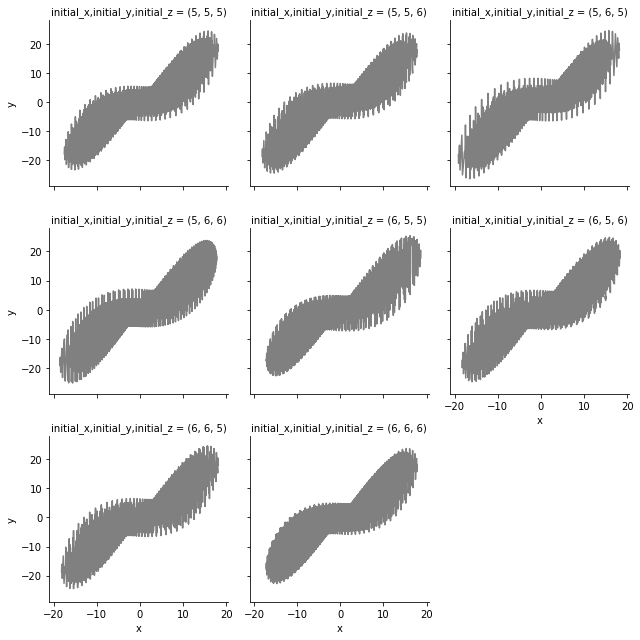

In [48]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y,initial_z",col_wrap=3)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)

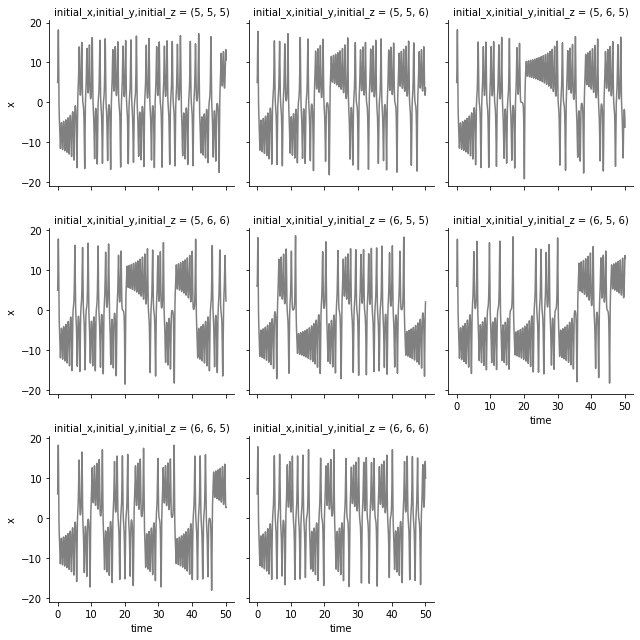

In [49]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y,initial_z", col_wrap=3)
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

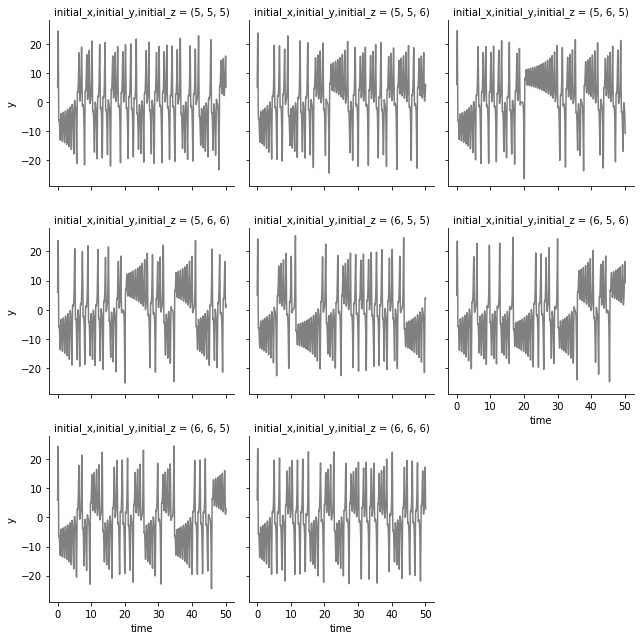

In [50]:
g = sns.FacetGrid(preds_test_df_0_combine,col="initial_x,initial_y,initial_z", col_wrap=3)
g.map(sns.lineplot, "time", "y", color=".5", ci=None)

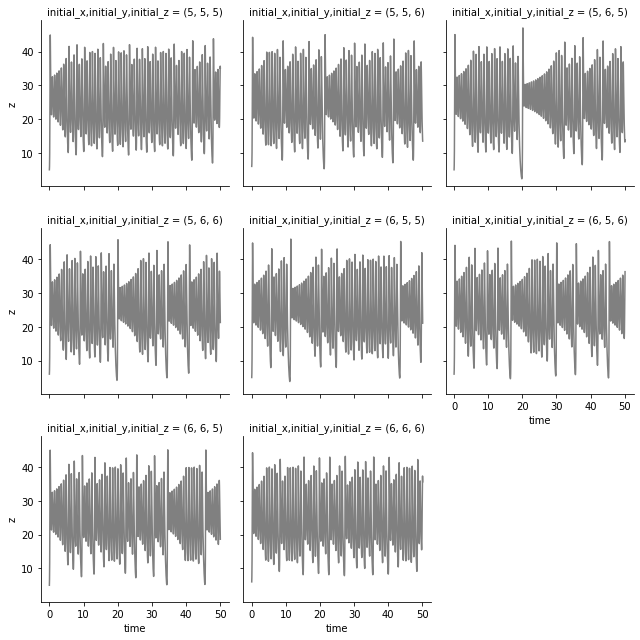

In [51]:
g = sns.FacetGrid(preds_test_df_0_combine,col="initial_x,initial_y,initial_z", col_wrap=3)
g.map(sns.lineplot, "time", "z", color=".5", ci=None)

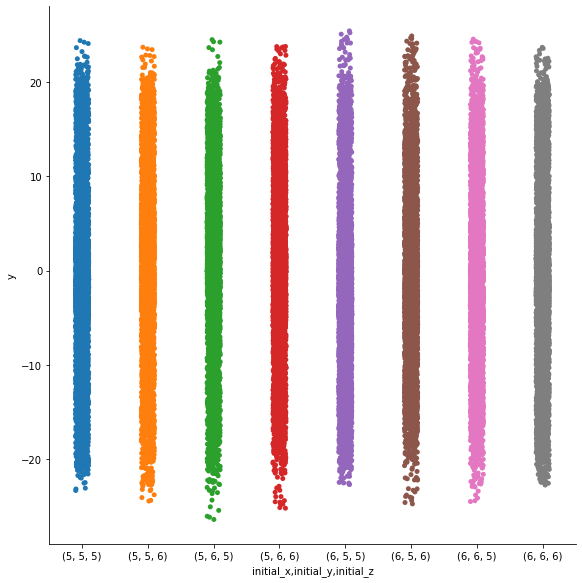

In [52]:
sns.catplot(height=8, data=preds_test_df_0_combine, x="initial_x,initial_y,initial_z", y="y")

This is the test data for testing future predictions. Future times simulations of the lorenz system which are not presented in the lorenz system

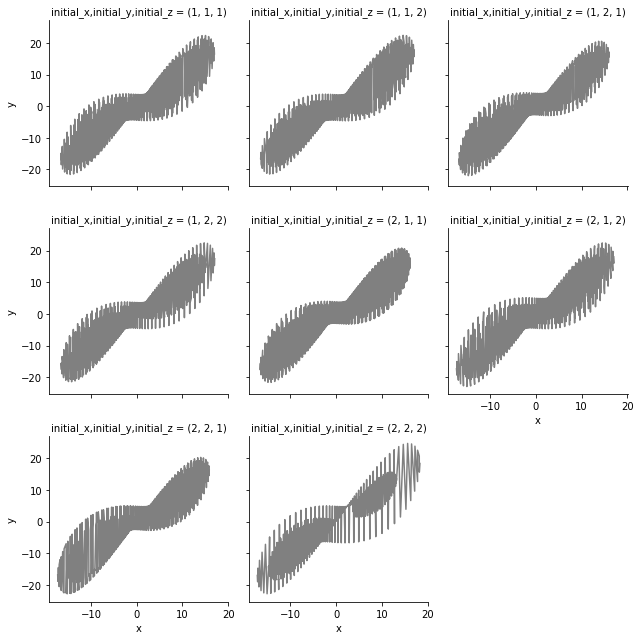

In [53]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y,initial_z", col_wrap=3)
g.map(sns.lineplot, "x", "y", color=".5", ci=None)

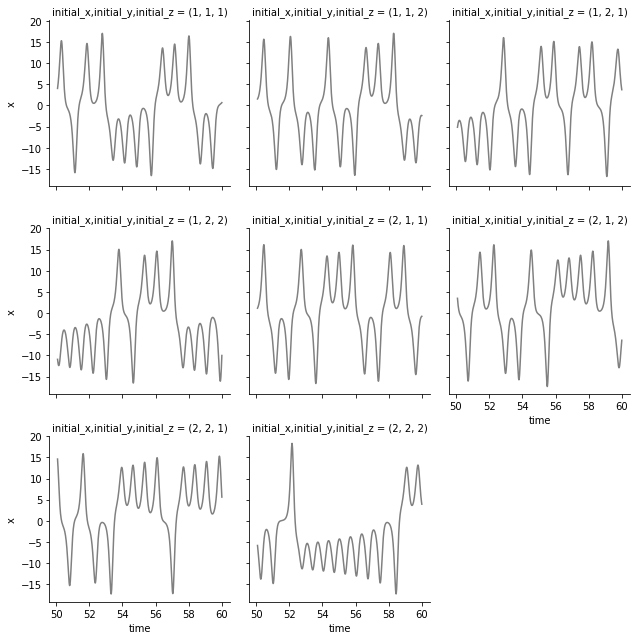

In [54]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y,initial_z", col_wrap = 3)
g.map(sns.lineplot, "time", "x", color=".5", ci=None)

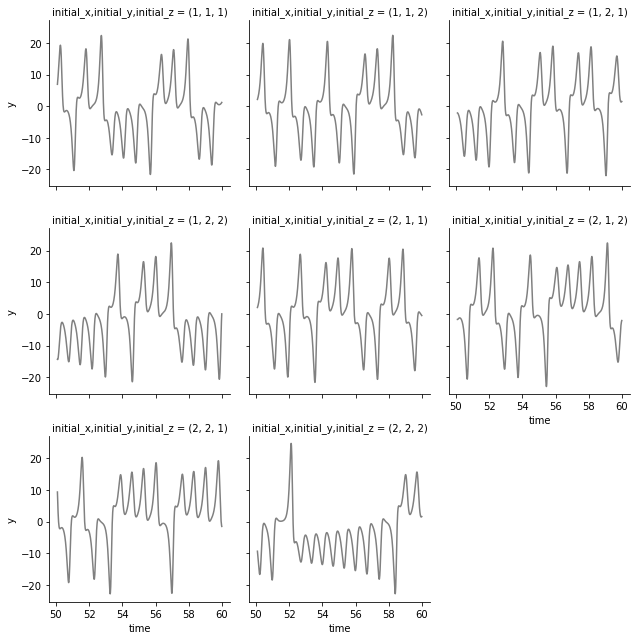

In [55]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y,initial_z", col_wrap=3)
g.map(sns.lineplot, "time", "y", color=".5", ci=None)

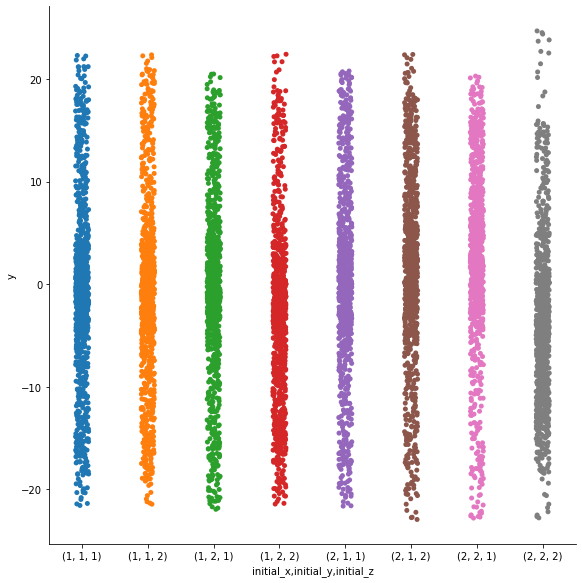

In [56]:
sns.catplot(height=8, data=preds_test_df_combine, x="initial_x,initial_y,initial_z", y="y")

### Predictions made by the neural network

This is looking at the predictions of test data with different initial times

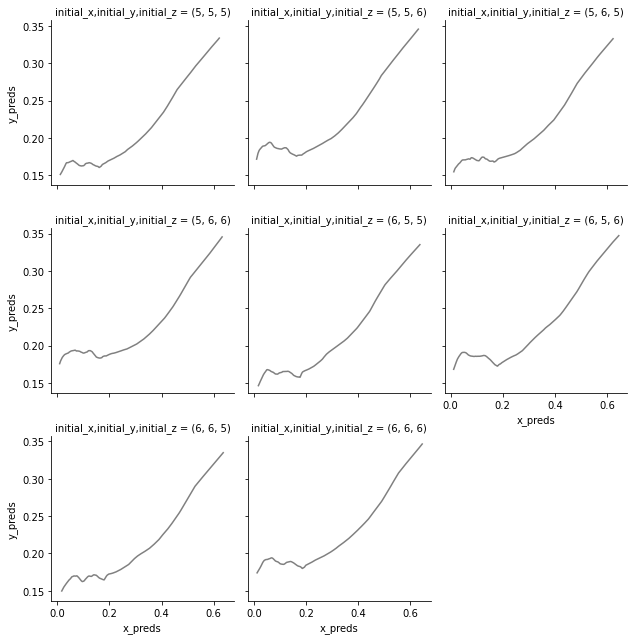

In [57]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y,initial_z", col_wrap = 3)
g.map(sns.lineplot, "x_preds", "y_preds", color=".5", ci=None)

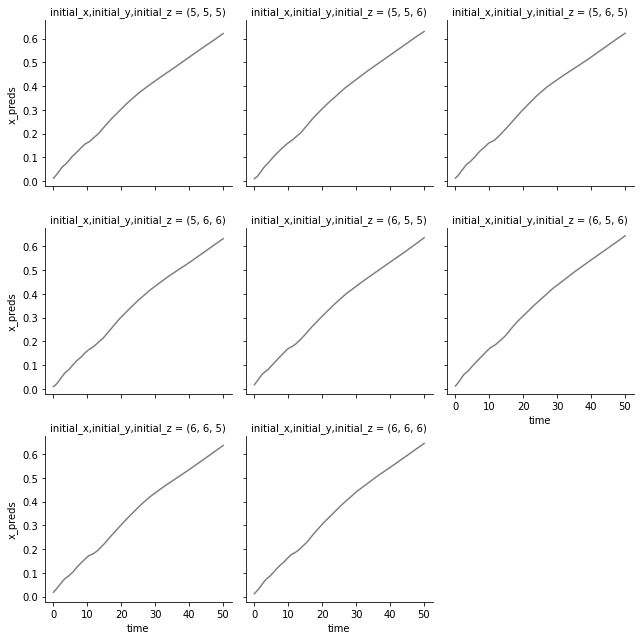

In [58]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y,initial_z", col_wrap =3)
g.map(sns.lineplot, "time", "x_preds", color=".5", ci=None)

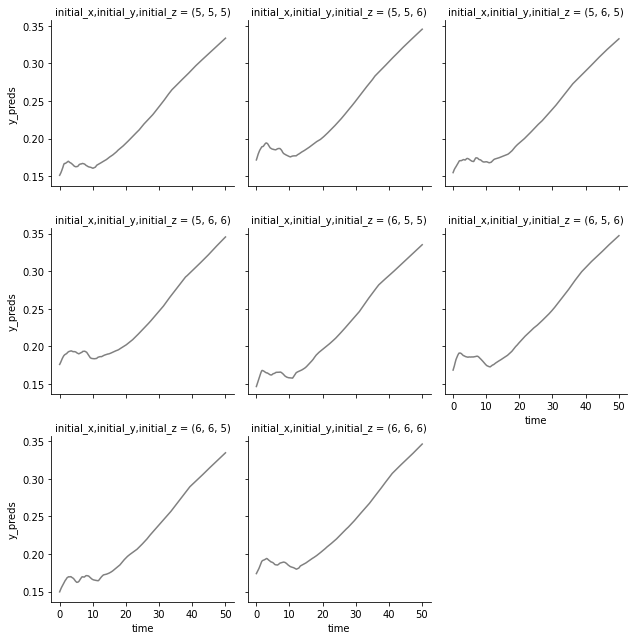

In [60]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y,initial_z", col_wrap = 3)
g.map(sns.lineplot, "time", "y_preds", color=".5", ci=None)

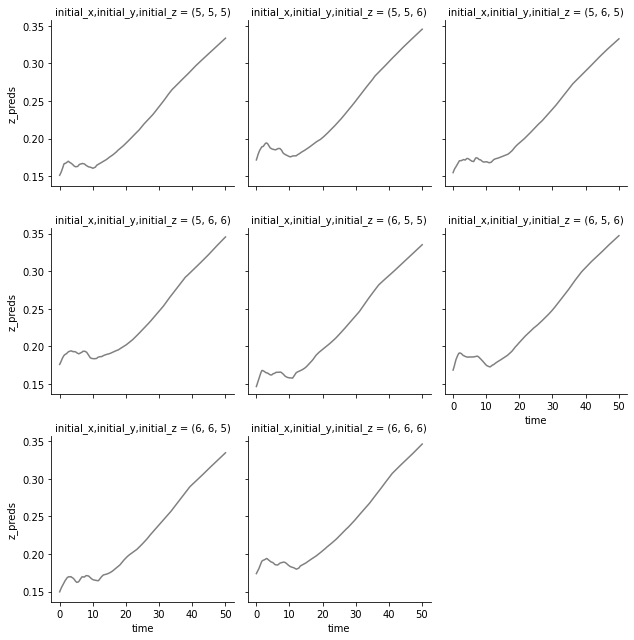

In [61]:
g = sns.FacetGrid(preds_test_df_0_combine, col="initial_x,initial_y,initial_z", col_wrap = 3)
g.map(sns.lineplot, "time", "z_preds", color=".5", ci=None)

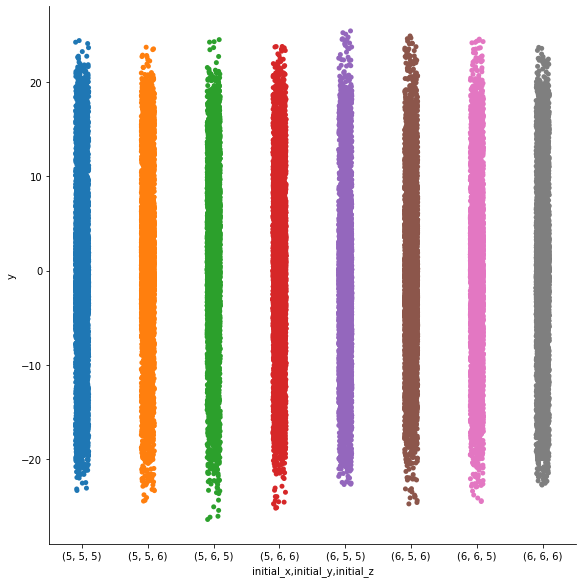

In [62]:
sns.catplot(height=8, data=preds_test_df_0_combine, x="initial_x,initial_y,initial_z", y="y")

This is looking at the test data of future times simulations of the lorenz system that is not presented in the lorenz system

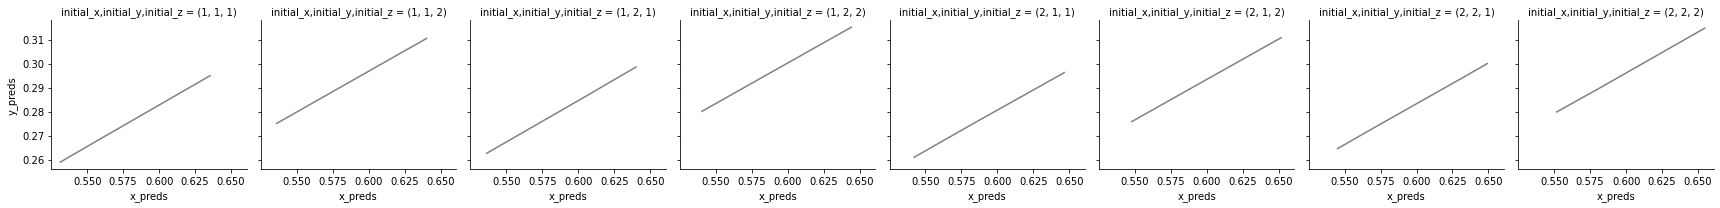

In [63]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y,initial_z")
g.map(sns.lineplot, "x_preds", "y_preds", color=".5", ci=None)

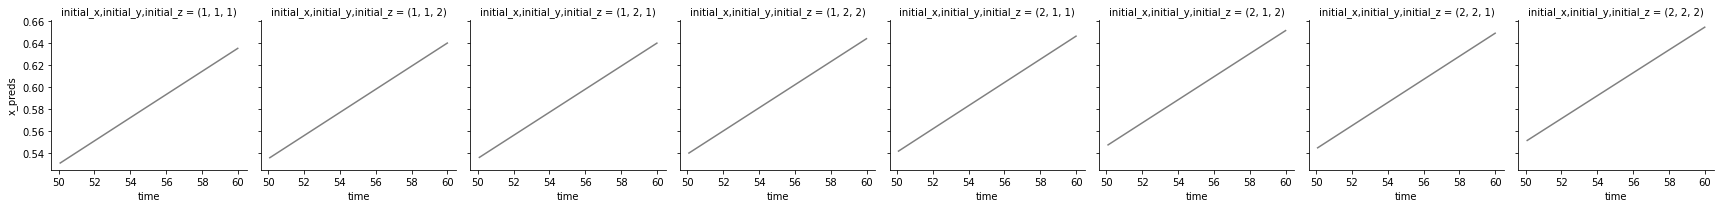

In [64]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y,initial_z")
g.map(sns.lineplot, "time", "x_preds", color=".5", ci=None)

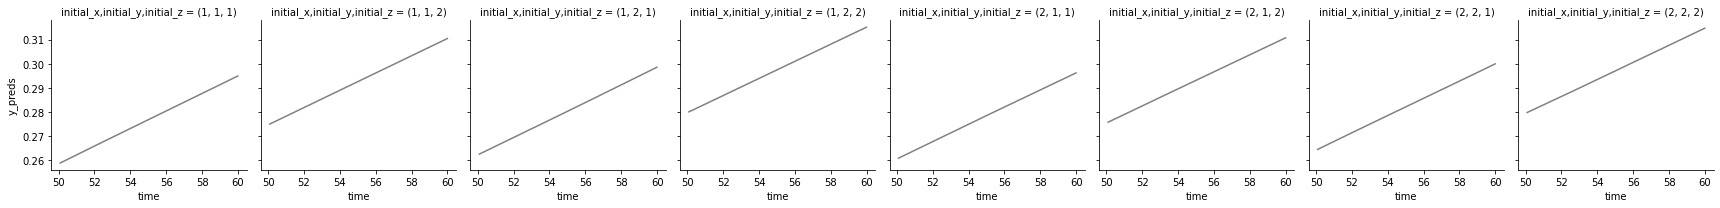

In [65]:
g = sns.FacetGrid(preds_test_df_combine, col="initial_x,initial_y,initial_z")
g.map(sns.lineplot, "time", "y_preds", color=".5", ci=None)

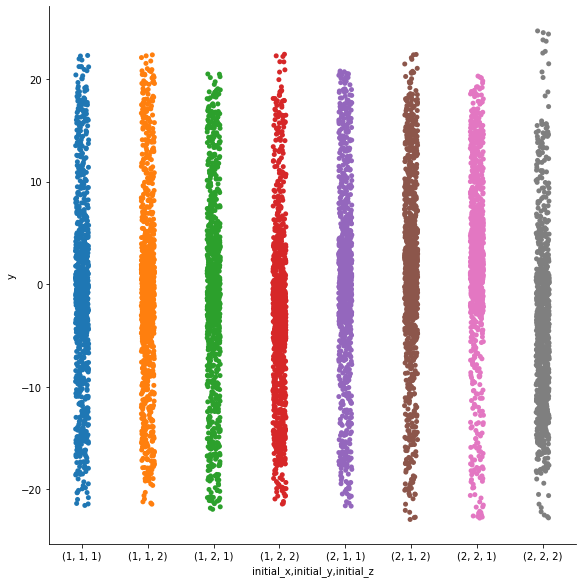

In [66]:
sns.catplot(height=8, data=preds_test_df_combine, x="initial_x,initial_y,initial_z", y="y")

### Combining the data

This section is going to compare the predictions of the neural network with the test data

This section is looking at how well the neural network can predict data with different initial time, which is not present in the training data

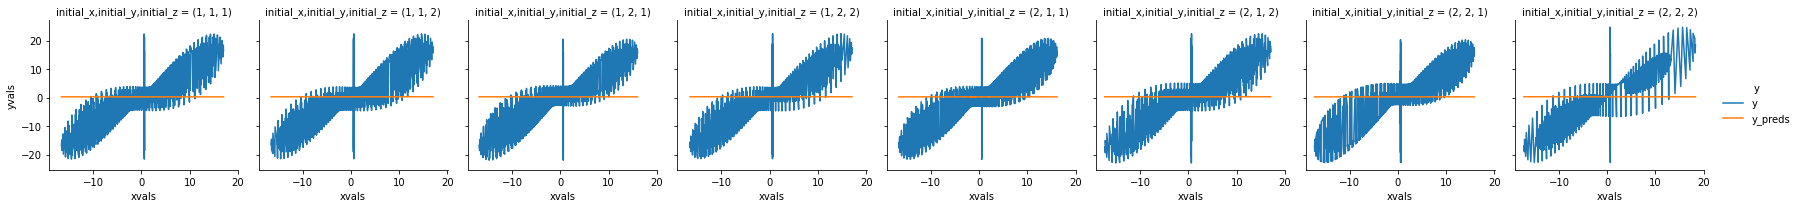

In [67]:
g = sns.FacetGrid(preds_test_df_0_combine_melt_xyz, col="initial_x,initial_y,initial_z", hue="y")
g.map(sns.lineplot, "xvals", "yvals", ci=None)
g.add_legend()

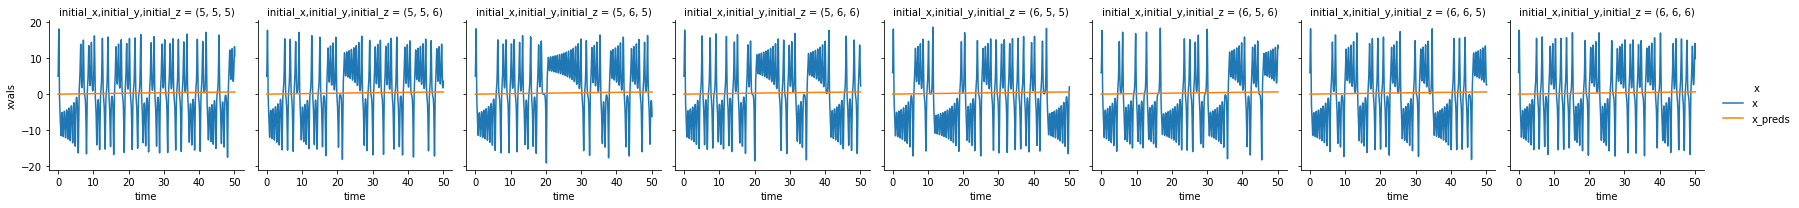

In [68]:
g = sns.FacetGrid(hue("x", preds_test_df_0_combine), col="initial_x,initial_y,initial_z", hue="x")
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

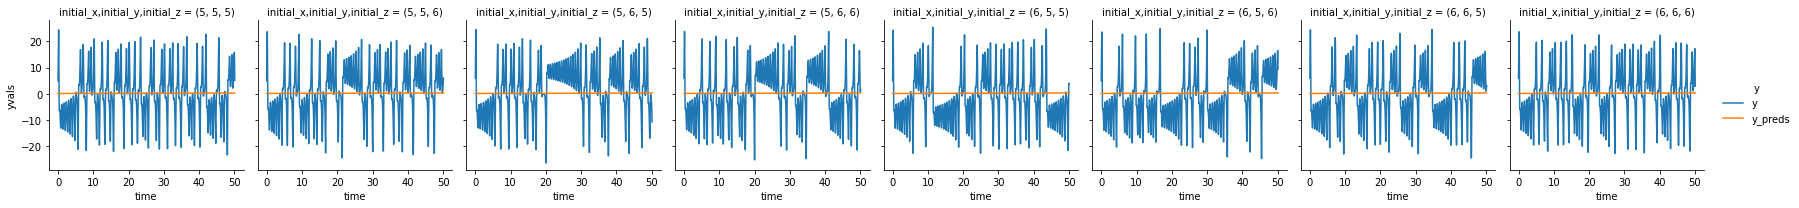

In [69]:
g = sns.FacetGrid(hue("y", preds_test_df_0_combine), col="initial_x,initial_y,initial_z", hue="y")
g.map(sns.lineplot, "time", "yvals", ci=None)
g.add_legend()

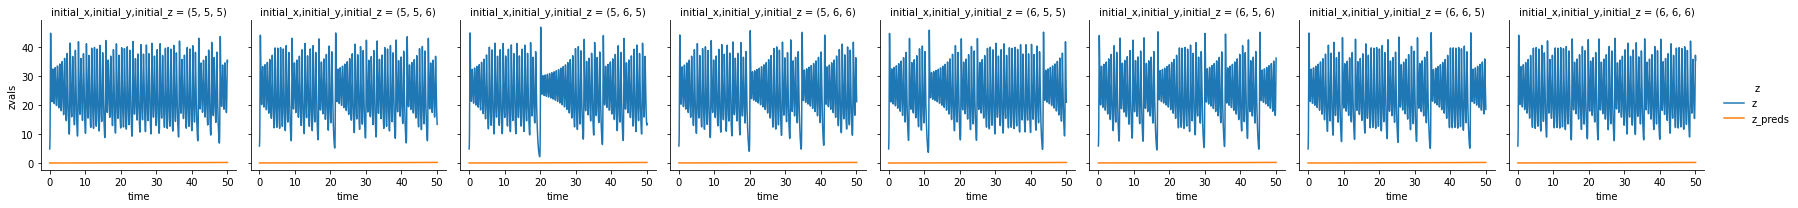

In [70]:
g = sns.FacetGrid(hue("z", preds_test_df_0_combine), col="initial_x,initial_y,initial_z", hue="z")
g.map(sns.lineplot, "time", "zvals", ci=None)
g.add_legend()

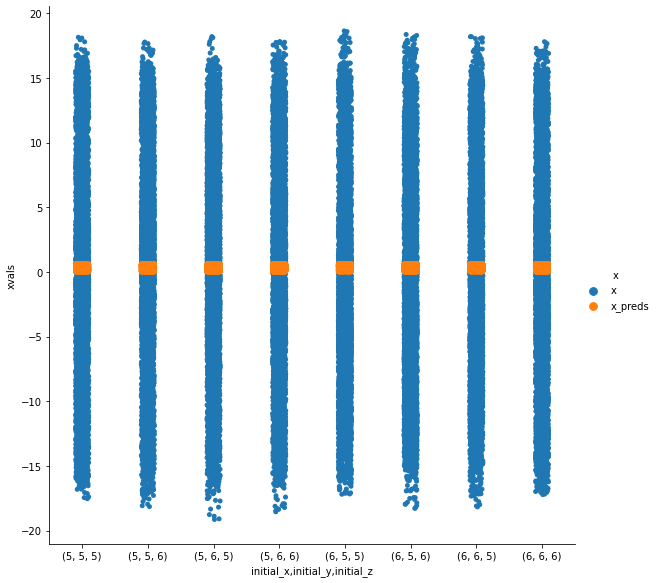

In [71]:
sns.catplot(height=8, data=hue("x", preds_test_df_0_combine), x="initial_x,initial_y,initial_z", y="xvals", hue="x")

This section is looking at how well the neural network is predicting future data. Times which are not are presented in the training data.

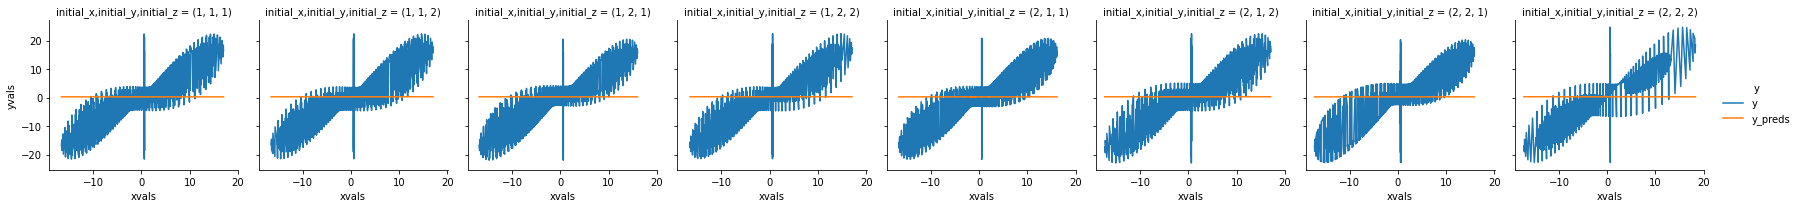

In [72]:
g = sns.FacetGrid(preds_test_df_combine_melt_xyz, col="initial_x,initial_y,initial_z", hue="y")
g.map(sns.lineplot, "xvals", "yvals", ci=None)
g.add_legend()

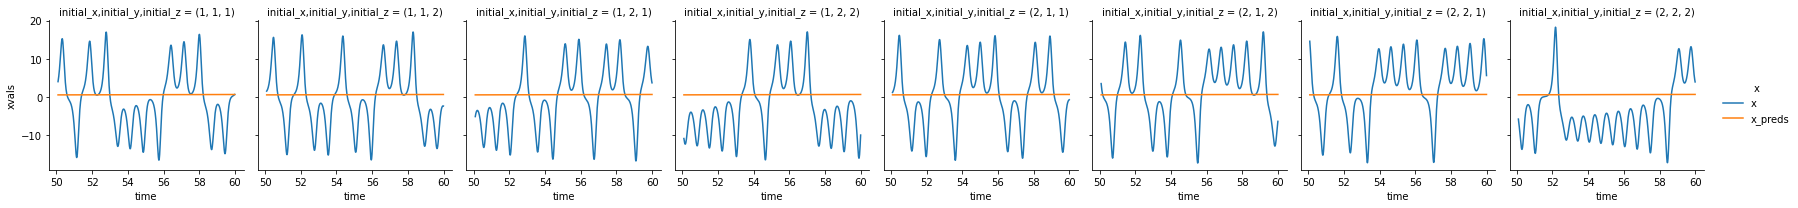

In [73]:
g = sns.FacetGrid(hue("x", preds_test_df_combine), col="initial_x,initial_y,initial_z", hue="x")
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

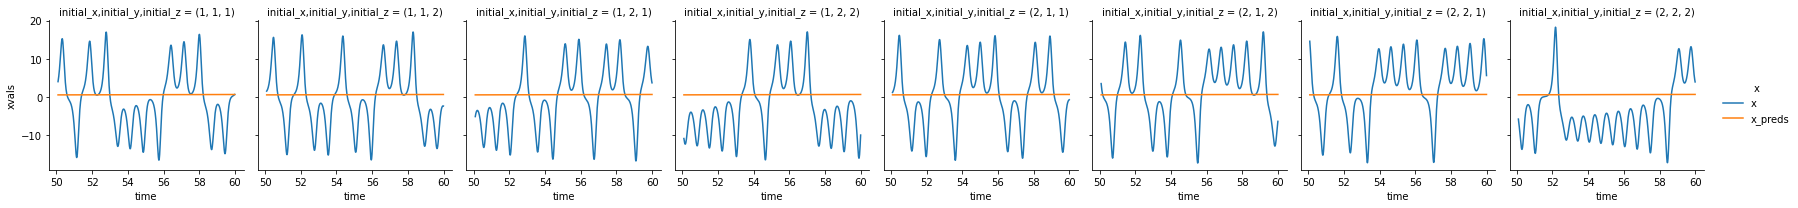

In [74]:
g = sns.FacetGrid(hue("x", preds_test_df_combine), col="initial_x,initial_y,initial_z", hue="x")
g.map(sns.lineplot, "time", "xvals", ci=None)
g.add_legend()

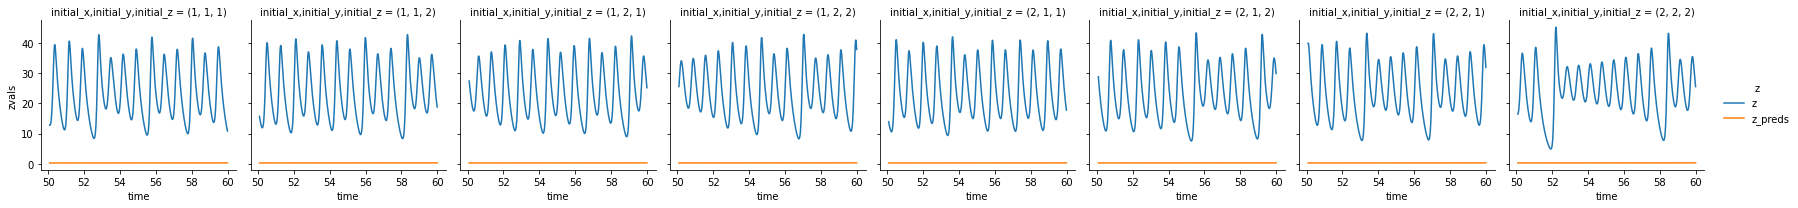

In [75]:
g = sns.FacetGrid(hue("z", preds_test_df_combine), col="initial_x,initial_y,initial_z", hue="z")
g.map(sns.lineplot, "time", "zvals", ci=None)
g.add_legend()

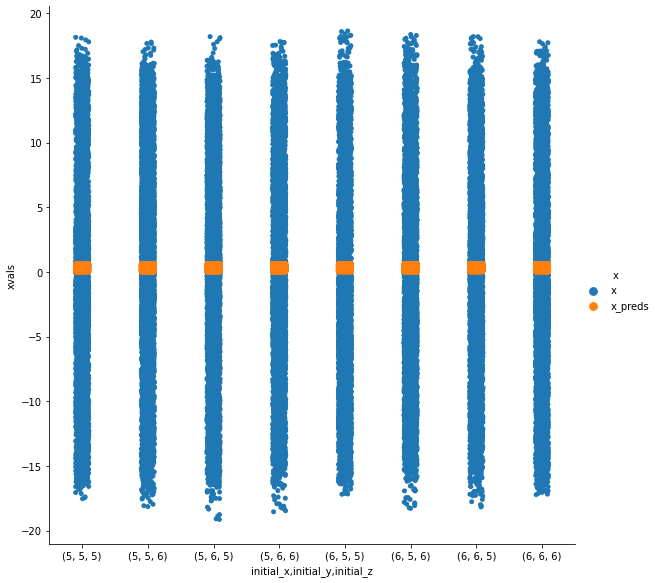

In [76]:
sns.catplot(height=8, data=hue("x", preds_test_df_0_combine), x="initial_x,initial_y,initial_z", y="xvals", hue="x")